In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from physics import definitions as phys

from scipy.optimize import fsolve

# Vectorized Piecewise Functions

In [2]:
# Define a piecewise function

def piece_func(x,y):

    if (x<10) & (y<10):
        return x+y
    elif (10<=x<=50) & (10<=y<=20):
        return x - y
    else:
        return 0


In [3]:
piece_func(20,15)

5

In [4]:
# Try a np.array input

x_list=np.arange(0,80,5)

In [5]:
x_list

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

This reproduces the error that I am dealing with. Now try a vectorized function.

In [6]:
vec_func = np.vectorize(piece_func)

In [7]:
vec_func(x_list,2)

array([2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

This implies that as soon as if condition is satisfied it runs that part for all input values, and doesn't go over each value in the vector.

Now, try a np.where approach

In [8]:
def piece_func(x,y):
    conditions = [
        (x<10) & (y<10),
        (10<=x<=50) & (10<=y<=20)
    ]

    vals=[
        (x+y),
        (x-y)
    ]

    np.where(conditions, vals, 0)

In [9]:
piece_func(x_list, 5)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
def piecewise_func(x, y):
    if x < 0 and y < 0:
        return x + y
    elif x >= 0 and y < 0:
        return x - y
    elif x < 0 and y >= 0:
        return -x + y
    else:
        return x * y

x_vals = np.array([-1, 0, 1])
y_vals = np.array([-2, 1, 2])

result = np.vectorize(piecewise_func)(x_vals, y_vals)

print(result)

[-3  0  2]


Try numpy.select for coding

In [11]:
def piece_func(x,y):
    conditions=[
        (x<10) & (y<10),
        (10<=x<=50) & (10<=y<=20)
    ]

    funcs = [
        (x+y),
        (x-y)
    ]

    return np.select(conditions , funcs)

In [12]:
piece_func(2,3)

array(5)

In [13]:
piece_func(x_list,2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
vec_func = np.vectorize(piece_func)

In [15]:
vec_func(x_list,2)

array([2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
import numpy as np

def piecewise_function(x, y):
    # Ensure x and y are numpy arrays for consistency
    x = np.asarray(x)
    y = np.asarray(y)

    # Define conditions
    conditions = [
        (x < 0) & (y < 0),
        (x >= 0) & (y < 0),
        (x < 0) & (y >= 0),
        (x >= 0) & (y >= 0)
    ]

    # Define corresponding outputs for each condition
    choices = [
        x + y,
        x - y,
        y - x,
        x * y
    ]

    # Use np.select to apply conditions and choices
    result = np.select(conditions, choices, default=np.nan)  # Use np.nan or another default if no condition is met

    return result

# Test with scalar inputs
scalar_result = piecewise_function(2, -3)
print(f"Scalar result: {scalar_result}")

# Test with array inputs
x_array = np.array([-1, 2, -3, 4])
y_array = np.array([-1, -2, 3, 4])
array_result = piecewise_function(x_array, y_array)
print(f"Array result: {array_result}")

# Test with array and scalar inputs
mix_result_xray = piecewise_function(x_array, -3)
mix_result_yray = piecewise_function(2, y_array)
print(f"Mix results with x_array and y scalar: {mix_result_xray}")
print(f"Mix results with x scalar and y_array: {mix_result_yray}")


Scalar result: 5.0
Array result: [-2.  4.  6. 16.]
Mix results with x_array and y scalar: [-4.  5. -6.  7.]
Mix results with x scalar and y_array: [3. 4. 6. 8.]


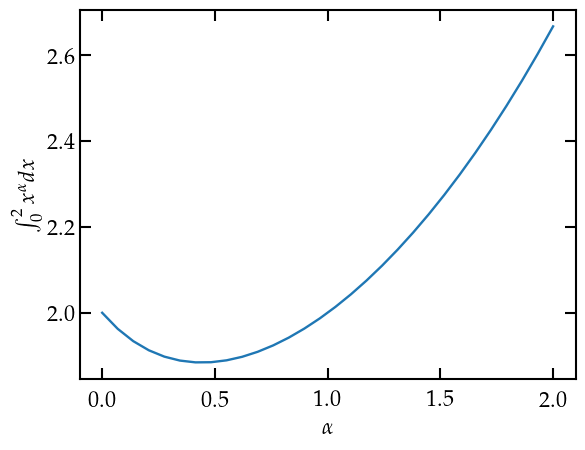

In [17]:
from scipy.integrate import quad_vec
import numpy as np
import matplotlib.pyplot as plt
alpha = np.linspace(0.0, 2.0, num=30)
f = lambda x: x**alpha
x0, x1 = 0, 2
y, err = quad_vec(f, x0, x1)
plt.plot(alpha, y)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\int_{0}^{2} x^\alpha dx$")
plt.show()

In [18]:
from scipy.optimize import fsolve

# Define the function with an extra parameter
def func(x, a):
    return x**3 - 2*x**2 - 5 + a

# Provide the value for the extra parameter
a_value = 3.0

# Provide an initial guess
initial_guess = 2.0

# Use lambda to include the extra argument
root = fsolve(lambda x: func(x, a_value), initial_guess)

print("Root:", root)

Root: [2.35930409]


In [19]:
def nH_Halo_crude(zvir, z):

    # Convert arguments to array
    zvir = np.asarray(zvir)
    z = np.asarray(z)
    
    # Define A
    A = (1+zvir)/(1+z)
    # Define conditions for pre and post collapse
    conditions = [
        (z>zvir),
        (z<=zvir)
    ]

    # Define values to return
    funcs=[
        phys.nH0*(1+z)**3 * np.exp((1.9*A) / (1 - 0.75*A**2)),
        ##1.2 * MAH(1e+8,zvir)/(1e+6) * ((1+zvir) / 10)**(3/2)
        phys.nH0*(1+zvir)**3 * np.exp(1.9 / (1 - 0.75))
    ]

    return np.select(conditions, funcs, default=0)

In [20]:
380*(8e-3/89)**(1/2)

3.602745519863827

In [21]:
(9+ 2*9.8*12)**(1/2)

15.626899884494046

In [22]:
9*1.8

16.2

In [23]:
250*0.2*0.2 / (2 * 9.8)

0.5102040816326531

In [24]:
0.51-0.2

0.31

In [25]:
30*9.8*4.5/8.2

161.34146341463415

In [26]:
1 - 1/(3)

0.6666666666666667

In [27]:
(4e+3)**(1/2)

63.245553203367585

In [28]:
0.25*20*20/0.07

1428.5714285714284

In [29]:
# Define Low Density Cooling Rate per H2 molecule 
def lambda_low_n(n,T):
    """ 
    Returns cooling rate per H2 molecule in low density regime. 
    units: ergs s^(-1)
    """
        
    x=np.log10(T)
    val = 10**( - 103.0 + 97.59*x - 48.05*(x)**2 + 10.80 * (x)**3 - 0.9032*(x)**4 )
    return val * n 

# Define LTE cooling rate 
def lambda_LTE(T): 

    """ 
    At LTE values, the cooling rate is independent of H number density 
    units: ergs s^(-1)
    """
    x = T/1e+3 
    # Rotational cooling term 
    lambda_rot_1 = ( (9.5e-22 * x**(3.76) ) / (1 + 0.12 * x**(2.1) ) *
                       np.exp(- (0.13/x)**3 ) 
                       )
    lambda_rot_2 = 3e-24*np.exp(-0.51 / x)

    # Vibrational Cooling Term 
    lambda_vib_1 = 6.7e-19*np.exp( - 5.86/x)
    lambda_vib_2 = 1.6e-18*np.exp( - 11.7/x)
    
    return (lambda_rot_1 + lambda_rot_2 + lambda_vib_1 + lambda_vib_2)


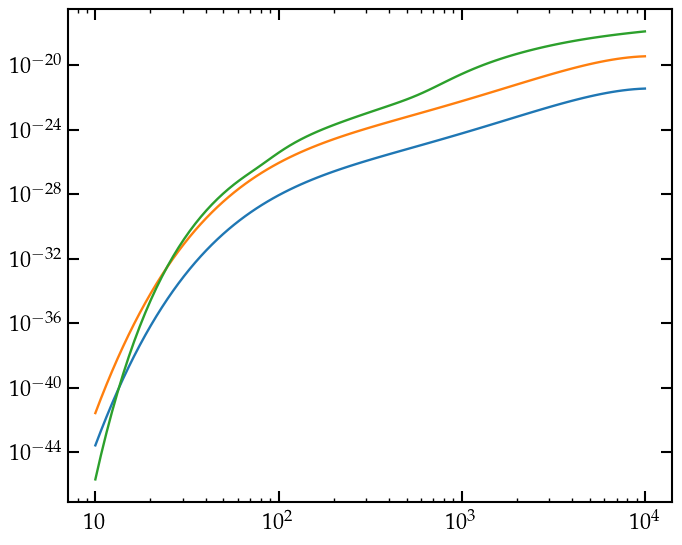

In [30]:
# Plot low density cooling rate vs high density cooling rate per H2 molecule 
temp_list =10**np.linspace(1,4,100)

plt.figure(figsize=(7.8,6.4))
plt.loglog() 

plt.plot ( temp_list, lambda_low_n(1,temp_list))
plt.plot ( temp_list, lambda_low_n(100,temp_list))
plt.plot ( temp_list, lambda_LTE(temp_list))


In [31]:
# Define the effective H2 cooling rate by bridging low density and high density pieces 
def lambda_H2_cool (nH , T): 
    val = lambda_low_n (nH,T) * lambda_LTE(T) / (lambda_low_n (nH,T) + lambda_LTE(T) )
    return val

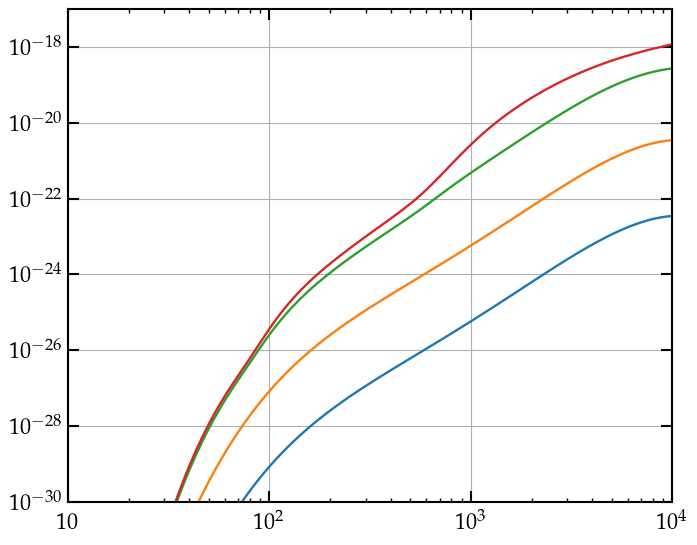

In [32]:
# Plot effective H2 cooling rate per molecule 

plt.figure(figsize=(7.8,6.4))
plt.loglog() 


plt.plot ( temp_list, lambda_H2_cool(0.1,temp_list))
plt.plot ( temp_list, lambda_H2_cool(10,temp_list))
plt.plot ( temp_list, lambda_H2_cool(1e+3,temp_list))
plt.plot ( temp_list, lambda_H2_cool(1e+5,temp_list))

plt.xlim(10,1e+4)
plt.ylim(1e-30, 1e-17)

plt.grid()

In [33]:
# Define H2 cooling function 

def lambda_H2_cool (T ,nH): 

    # Define Low Density Cooling Rate
    def lambda_low_n(T):
        x=np.log10(T)
        val = 10**( - 103.0 + 97.59*x - 48.05*(x)**2 + 10.80 * (x)**3 - 0.9032*(x)**4 )
        return val 

    # Define LTE cooling rate 
    def lambda_LTE(T): 

        x = T/1e+3 
        # Rotational cooling term 
        lambda_rot_1 = ( (9.5e-22 * x**(3.76) ) / (1 + 0.12 * x**(2.1) ) *
                       np.exp(- (0.13/x)**3 ) 
                       )
        lambda_rot_2 = 3e-24*np.exp(-0.51 / x)

        # Vibrational Cooling Term 
        lambda_vib_1 = 6.7e-19*np.exp( - 5.86/x)
        lambda_vib_2 = 1.6e-18*np.exp( - 11.7/x)

        return (lambda_rot_1 + lambda_rot_2 + lambda_vib_1 + lambda_vib_2)

    # Define critical density to H number density 
    ncr_nH = lambda_LTE(T) / lambda_low_n(T)

    # Define total cooling rate 
    val = lambda_LTE(T) / ( 1 + ncr_nH )
    
    return val

In [34]:
lambda_H2_cool(5000,0.1)

np.float64(1.132172941825851e-22)

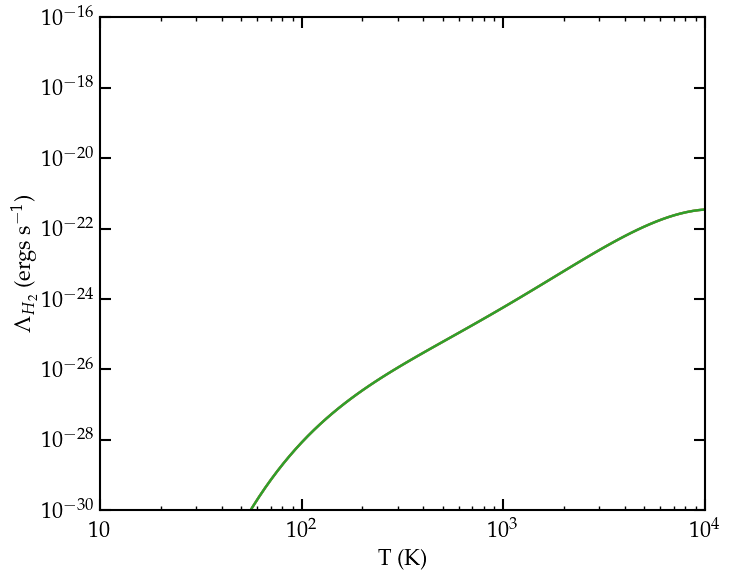

In [35]:
temp_list =10**np.linspace(1,4,100)

plt.figure(figsize=(7.8,6.4))
plt.loglog()

plt.plot(temp_list, lambda_H2_cool(temp_list, 1))
plt.plot(temp_list, lambda_H2_cool(temp_list, 1e+2))
plt.plot(temp_list, lambda_H2_cool(temp_list, 1e+6))

plt.ylim(1e-30, 1e-16)
plt.xlim(1e+1,1e+4)

plt.xlabel('T (K)')
plt.ylabel(r'$\Lambda_{H_2}$ (ergs s$^{-1}$)')

plt.show()

This agrees well with Galli and Palla 1998 fig. A1

TypeError: lambda_H2_cool() missing 1 required positional argument: 'nH'

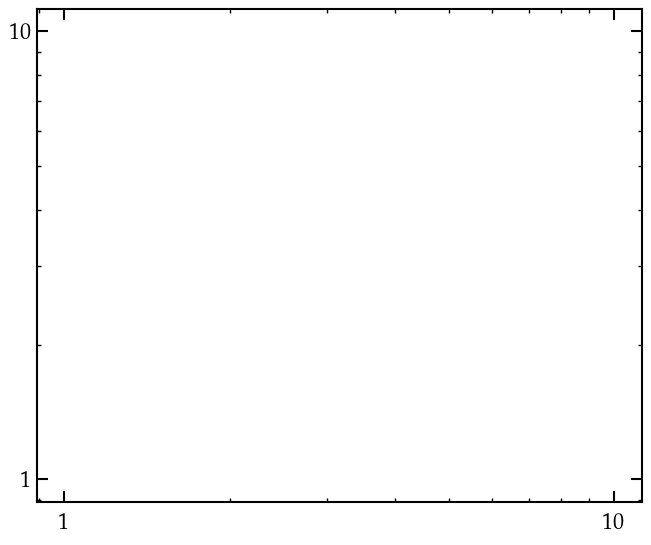

In [36]:
temp_list =10**np.linspace(2,4,100)

plt.figure(figsize=(7.8,6.4))
plt.loglog()

plt.plot(temp_list, 100*1e-4*lambda_H2_cool(temp_list))
plt.plot(temp_list, phys.lambda_H2(1e-4,10,temp_list))
plt.grid()

plt.ylim(1e-30, 1e-21)
plt.xlim(1e+1,1e+4)

In [ ]:
# Define H-I excitation cooling rate 
def H_cool_excite (T): 
    val = 7.5e-19*(1 + (T/1e+5)**(1/2) )**(-1) * np.exp(-118348/T)
    return val

# Define H-I ionization cooling rate
def H_cool_ionize (T): 
    val = 1.27e-21*T**(1/2)*( 1 + (T/1e+5)**(1/2) )**(-1) * np.exp(-157809.1/T)
    return val 

# Define H-I Recombination Cooling rate
def H_cool_recomb (T): 
    val = 8.7e-27

NameError: name 'H_cool_excite' is not defined

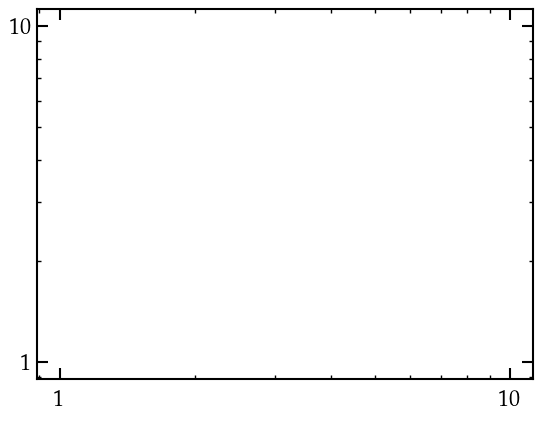

In [37]:
# Plot rate 
temp_list = 10**np.linspace(3,5,50)

plt.figure()
plt.loglog()
plt.plot(temp_list, H_cool_excite(temp_list) )
plt.plot(temp_list, H_cool_ionize(temp_list))

plt.ylim(1e-28,1e-20)

plt.grid()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define different-sized 1D arrays
x = np.linspace(-2, 2, 4)  # 4 points from -2 to 2
y = np.linspace(-3, 3, 6)  # 6 points from -3 to 3

# Create the meshgrid
X, Y = np.meshgrid(x, y, indexing='ij')  # Use 'ij' for non-square grids

# Compute a function over the grid
Z = np.exp(-X**2 - Y**2)  # A Gaussian-like function

# Print the meshgrid to verify
print("X Grid:\n", X)
print("Y Grid:\n", Y)

In [38]:
# Define t_ff 

def t_ff (n): 
    val = 3 * np.pi / ( 32 * phys.G * 1.22 *phys.mp * n)
    return val**(1/2)

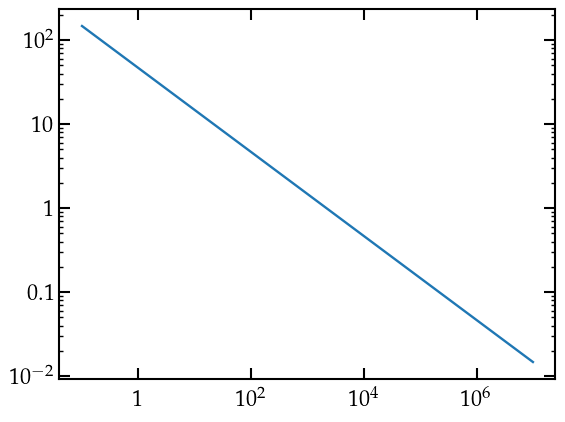

In [39]:
# Plot Free fall time scale 
plt.figure()
plt.loglog()

plt.plot( 10**np.linspace(-1,7), t_ff(10**np.linspace(-1,7))/phys.yrs_to_sec/1e+6 )

In [40]:
phys.G

6.674e-08

In [41]:
phys.mp

1.67262171e-24

In [42]:
print(f'{phys.kB * 8000 *phys.eV_to_ergs / lambda_LTE(8000) / t_ff(1e+4):.2e}' )

8.18e-08


In [43]:
phys.C_Hminus (1e+4) *1e-7 *1e+4 /1e-7

2.869953492449156e-11

In [44]:
def lambda_H_cool(xe, nH, T): 
    val = 7.5e-19*(1 + (T/1e+5)**(1/2))**(-1) * np.exp(-118348/T)
    return val * xe * nH**2

In [45]:
lambda_H_cool (2e-4, 8000, 1e+4)

np.float64(5.2863005432995976e-20)

In [46]:
lambda_H2_cool (1e+4, 8000) * 1e+4 * 6e-6

np.float64(2.083658161266644e-23)

In [47]:
6e-6 * phys.Rvir(10,3e+7) * 1e+4 * 0.1 * phys.pc_to_cm

1.6892167802952116e+19

In [48]:
1e-4* phys.Rvir(10,3e+7) * 

SyntaxError: invalid syntax (2281660178.py, line 1)

In [49]:
def func(xH2): 
    return xH2 * 1e+4 * lambda_LTE(8e+3) - lambda_H_cool(2e-4, 1e+4, 8e+3)

In [50]:
fsolve(func, 1e-6)

array([4.78653373e-07])

In [51]:
phys.C_Hminus(8e+3) * 1e-4 * 1e+4 / 1e-6

2.877442059813532e-09

In [61]:
np.exp( - 43900 /1e+4) * 3.52e-9 * 1 

np.float64(4.365056685596079e-11)

In [62]:
6.67e-12 * (1e+4)**(1/2) * np.exp(-  (1 + 63593.0/1e+4))

np.float64(4.246415175615754e-13)